# 에이치엘비 최적조회수는 2개
사전준비 : api_key

In [1]:
from googleapiclient.discovery import build
api_key = <api키>
channel_id = "UCH98-54LGg386084raqob6g"
youtube = build("youtube", "v3", developerKey=api_key)

In [2]:
def get_channel_videos(channel_id):
    res = youtube.channels().list(part="contentDetails",
                                  id=channel_id).execute()
    playlist_id = res["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]
    
    videos = []
    next_page_token = None
    
    while 1:
        res = youtube.playlistItems().list(part="snippet",
                                           playlistId=playlist_id,
                                           maxResults=50,
                                           pageToken=next_page_token).execute()
        videos += res["items"]
        next_page_token = res.get("nextPageToken")
        
        if next_page_token is None:
            break
    
    return videos

In [3]:
videos = get_channel_videos(channel_id)

In [21]:
title = []
publishedAt = []
for video in videos:
    title.append(video['snippet']['title'])
    publishedAt.append(video['snippet']['publishedAt'])

In [25]:
video_ids = list(map(lambda x:x['snippet']['resourceId']['videoId'], videos))

In [26]:
def get_videos_stats(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):
        res = youtube.videos().list(id=','.join(video_ids[i:i+50]),
                                   part='statistics').execute()
        stats += res['items']
    return stats

In [27]:
stats = get_videos_stats(video_ids)

In [28]:
viewcount = []
for i in range(len(stats)):
    viewcount.append(stats[i]['statistics']['viewCount'])

In [181]:
import pandas as pd
dict = {'publishedAt':publishedAt, 'title':title, 'viewcount':viewcount}
df = pd.DataFrame(dict)

In [182]:
df = df[df['title'].str.contains('에이치엘비')]

In [183]:
df['viewcount'] = pd.to_numeric(df['viewcount'])

In [184]:
df['publishedAt'] = df['publishedAt'].str[:10]

In [185]:
date = df['publishedAt'].value_counts().index

In [191]:
viewcount_mean = []
for i in date:
    df_date
    df_date = df[df['publishedAt'].str.contains(i)]
    mean = df_date['viewcount'].mean()
    viewcount_mean.append(mean)

In [198]:
count = df['publishedAt'].value_counts()

In [199]:
len(count)

284

In [200]:
len(viewcount_mean)

284

In [204]:
import pandas as pd
dict = {'count':count, 'viewcount':viewcount_mean}
df = pd.DataFrame(dict)

In [207]:
df['viewcount'] = pd.to_numeric(df['viewcount'])

In [251]:
time = []
viewcount = []
for i in range(1, df['count'].values[0]+1):
    df_count = df[df['count'].values == i]
    mean = df_count['viewcount'].mean()
    time.append(i)
    viewcount.append(mean)

In [254]:
import matplotlib.pyplot as plt

<BarContainer object of 19 artists>

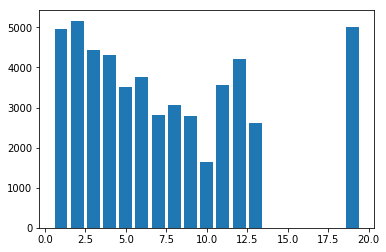

In [260]:
plt.bar(time, viewcount)

# 결론: 2개 업로드가 조회수 가장 높다.